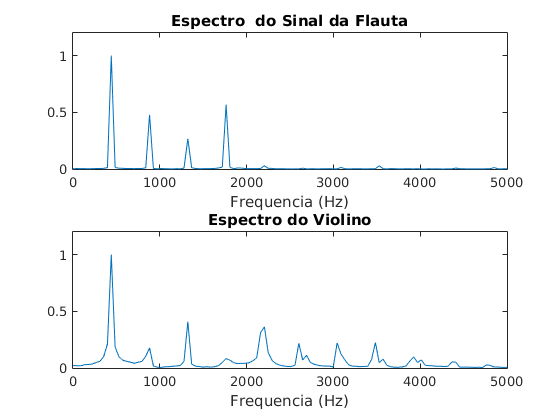

In [4]:
% Limpa variáveis e fecha todos os gráficos
close all;clc;clear all;  
soundFile = ['/home/mateuscastelobranco/DCO2004_2019/MATERIAL/HD_03_MATLAB/Flauta.wav'];             % Especifica do local e nome do arquivo de áudio
[vtSom_flauta, dFa_flauta] = audioread(soundFile);                              % Abre arquivo
soundFile1 = ['/home/mateuscastelobranco/DCO2004_2019/MATERIAL/HD_03_MATLAB/Violino.wav'];             % Especifica do local e nome do arquivo de áudio
[vtSom_violino, dFa_violino] = audioread(soundFile1);
tf = 1;                                                         % Tempo que deseja tocar o arquivo
amostras_flauta = ceil(tf*dFa_flauta);
amostras_violino = ceil(tf*dFa_violino);
vtSom_flauta = vtSom_flauta(1:amostras_flauta,:); 
vtSom_violino = vtSom_violino(1:amostras_violino,:);
dta = 1/dFa_flauta; 
dta1 = 1/dFa_violino;
dTFinal = (length(vtSom_flauta)-1)*dta;                                  % Tempo da última amostra do sinal de áudio
dTFinal1 = (length(vtSom_violino)-1)*dta1;
vtTSom = 0:dta:dTFinal;                                           % Eixo temporal do arquivo de áudio
vtTSom1 = 0:dta:dTFinal1;
%plot(vtTSom,vtSom);
%plot(vtTSom1,vtSom1);

teste=fft(vtSom_flauta,1000)/1000;
frequencia = [0 : dFa_flauta/1000 : dFa_flauta/2 - dFa_flauta/1000];
teste_uni=teste(1:1000/2);

teste1=fft(vtSom_violino,1000)/1000;
frequencia = [0 : dFa_violino/1000 : dFa_violino/2 - dFa_violino/1000];
teste_uni1=teste1(1:1000/2);

vm=max(abs(teste_uni));
vm1=max(abs(teste_uni1));

subplot (2,1,1);
plot(frequencia,abs(teste_uni)/vm);
title(['Espectro  do Sinal da Flauta']);
xlabel('Frequencia (Hz)'); 
axis([ 0 5000 0 1.2]);
subplot (2,1,2);
plot(frequencia,abs(teste_uni1)/vm1);
title(['Espectro do Violino']);
xlabel('Frequencia (Hz)');                                                    
axis([ 0 5000 0 1.2]);  


In [7]:
p = audioplayer(vtSom_flauta, 1*dFa_flauta);                                   
play(p);
pause(tf);

p1 = audioplayer(vtSom_violino, 1*dFa_violino);                                   
play(p1);
pause(tf);

[0, 5000, 0, 1.2]

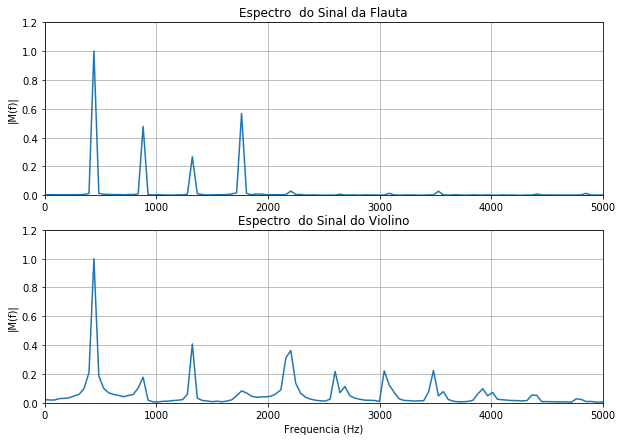

In [2]:
import numpy as np
import scipy.io.wavfile as wv 
import os
import matplotlib.pyplot as plt

soundFile = '/home/mateuscastelobranco/DCO2004_2019/MATERIAL/HD_03_MATLAB/Flauta.wav' # Especifica do local e nome do arquivo de áudio
dFa,vtSom_flauta = wv.read(soundFile)  

soundFile1 = '/home/mateuscastelobranco/DCO2004_2019/MATERIAL/HD_03_MATLAB/Violino.wav' # Especifica do local e nome do arquivo de áudio
dFa1,vtSom_violino = wv.read(soundFile1) 

lfft = 1000
## Construção do single-sided amplitude spectrum.
flauta_fft = np.fft.fft(vtSom_flauta,lfft)/lfft                               # Cálculo da FFT via função do Matlab
violino_fft = np.fft.fft(vtSom_violino,lfft)/lfft 
freq1 = np.arange(0,dFa/2,dFa/lfft)              # Definição do eixo das frequências unilateral
flauta_uni = flauta_fft[0:lfft//2]                                    # Coleta da FFT unilateral
violino_uni = violino_fft[0:lfft//2]

vm=max(np.abs(flauta_uni));   #para normalização
vm1=max(np.abs(violino_uni)); #para normalização

plt.figure(1,[10,7])
plt.subplot(211)
plt.plot(freq1,np.abs(flauta_uni)/vm)                              # Plotagem do espectro unilateral M(f)
plt.title('Espectro  do Sinal da Flauta')                             # Configuração do título do gráfico 
#plt.xlabel('Frequencia (Hz)')                               # Configuração do eixo x do gráfico 
plt.ylabel('|M(f)|')                                         # Configuração do eixo y do gráfico  
plt.grid()
plt.axis([0,5000,0,1.2])

plt.subplot(212)
plt.plot(freq1,np.abs(violino_uni)/vm1)  
plt.title('Espectro  do Sinal do Violino')                             # Configuração do título do gráfico 
plt.xlabel('Frequencia (Hz)')                               # Configuração do eixo x do gráfico 
plt.ylabel('|M(f)|')                                         # Configuração do eixo y do gráfico  
plt.grid()                                                   # Adiona o grid  
plt.axis([0,5000,0,1.2])  